## Observations and Insights 

In [571]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from numpy import percentile
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

print(mouse_metadata)
print(study_results)

# Combine the data into a single dataset

combine_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="right")

# Display the data table for preview

combine_df


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0       k403     Ramicane    Male          21          16
1       s185    Capomulin  Female           3          17
2       x401    Capomulin  Female          16          15
3       m601    Capomulin    Male          22          17
4       g791     Ramicane    Male          11          16
..       ...          ...     ...         ...         ...
244     z314     Stelasyn  Female          21          28
245     z435     Propriva  Female          12          26
246     z581    Infubinol  Female          24          25
247     z795     Naftisol  Female          13          29
248     z969     Naftisol    Male           9          30

[249 rows x 5 columns]
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0        b128          0           45.000000                 0
1        f932          0           45.000000                 0
2        g107          0           45.000000                 0
3        a457          0    

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [572]:
# Checking the number of mice.

combine_df["Mouse ID"].count()


1893

In [573]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

groupby_mouseID = combine_df.groupby("Mouse ID")
duplicate_ID = pd.DataFrame(groupby_mouseID["Timepoint"].count()).sort_values("Timepoint",ascending=False)
filtered_duplicate_ID = duplicate_ID.loc[duplicate_ID["Timepoint"] > 1, :]
filtered_duplicate_ID

,Timepoint
Mouse ID,
g989,13
a203,10
n364,10
m546,10
m550,10
...,...
f394,2
f278,2
n630,2


In [574]:
# Optional: Get all the data for the duplicate mouse ID. 

groupby_mouseID = combine_df.groupby("Mouse ID")
all_df = groupby_mouseID.mean()
print(all_df)
print(filtered_duplicate_ID)
combine_all_filtered_duplicate_ID = pd.merge(all_df,filtered_duplicate_ID,on="Mouse ID",how="inner")
combine_all_filtered_duplicate_ID = combine_all_filtered_duplicate_ID.rename(columns = {"Timepoint_y" : "Count", "Timepoint_x" : "Timepoint"})
combine_all_filtered_duplicate_ID


          Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  \
Mouse ID                                                          
a203            20.0        23.0       22.5           56.312708   
a251            21.0        25.0       22.5           55.237095   
a262            17.0        29.0       22.5           58.611631   
a275            20.0        28.0       22.5           52.770965   
a366            16.0        29.0       15.0           54.639906   
...              ...         ...        ...                 ...   
z435            12.0        26.0        5.0           46.942214   
z578            11.0        16.0       22.5           38.411510   
z581            24.0        25.0       22.5           53.979584   
z795            13.0        29.0       22.5           54.880317   
z969             9.0        30.0       22.5           60.194652   

          Metastatic Sites  
Mouse ID                    
a203              1.100000  
a251              0.800000  
a262        

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Count
Mouse ID,,,,,,
a203,20.0,23.0,22.5,56.312708,1.100000,10
a251,21.0,25.0,22.5,55.237095,0.800000,10
a262,17.0,29.0,22.5,58.611631,2.300000,10
a275,20.0,28.0,22.5,52.770965,1.200000,10
a366,16.0,29.0,15.0,54.639906,0.142857,7
...,...,...,...,...,...,...
z435,12.0,26.0,5.0,46.942214,0.000000,3
z578,11.0,16.0,22.5,38.411510,0.000000,10
z581,24.0,25.0,22.5,53.979584,2.000000,10


In [575]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

groupby_mouseID = combine_df.groupby(["Mouse ID","Drug Regimen","Sex"])
clean_df = groupby_mouseID.mean()
clean_df


,,,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,Drug Regimen,Sex,,,,,
a203,Infubinol,Female,20.0,23.0,22.5,56.312708,1.100000
a251,Infubinol,Female,21.0,25.0,22.5,55.237095,0.800000
a262,Placebo,Female,17.0,29.0,22.5,58.611631,2.300000
a275,Ceftamin,Female,20.0,28.0,22.5,52.770965,1.200000
a366,Stelasyn,Female,16.0,29.0,15.0,54.639906,0.142857
...,...,...,...,...,...,...,...
z435,Propriva,Female,12.0,26.0,5.0,46.942214,0.000000
z578,Ramicane,Male,11.0,16.0,22.5,38.411510,0.000000
z581,Infubinol,Female,24.0,25.0,22.5,53.979584,2.000000


In [576]:
# Checking the number of mice in the clean DataFrame.

clean_df["Timepoint"].count()


249

## Summary Statistics

In [577]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regv

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

groupby_regimen = clean_df.groupby("Drug Regimen")
mean = pd.DataFrame(groupby_regimen["Tumor Volume (mm3)"].mean())
median = pd.DataFrame(groupby_regimen["Tumor Volume (mm3)"].median())
variance = pd.DataFrame(groupby_regimen["Tumor Volume (mm3)"].var())
standard = pd.DataFrame(groupby_regimen["Tumor Volume (mm3)"].std())
sem = pd.DataFrame(groupby_regimen["Tumor Volume (mm3)"].sem())


In [578]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

summary_stats = mean.merge(median,on='Drug Regimen').merge(variance,on='Drug Regimen').merge(standard,on='Drug Regimen').merge(sem,on='Drug Regimen')
summary_stats_v2 = summary_stats.set_axis(['Mean', 'Median', 'Variance', 'Standard deviation', 'SEM'], axis=1, inplace=False)
summary_stats_v2


,Mean,Median,Variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.755487,41.384825,10.529290,3.244887,0.648977
Ceftamin,50.827485,52.128041,14.040506,3.747066,0.749413
Infubinol,51.383443,51.897959,17.380408,4.168982,0.833796
Ketapril,53.432527,53.725479,24.086484,4.907798,0.981560
Naftisol,52.499395,53.353053,22.886774,4.784012,0.956802
Placebo,52.540611,53.392180,19.610351,4.428358,0.885672
Propriva,50.557868,49.923649,15.117558,3.888130,0.777626
Ramicane,40.555988,40.108578,10.256711,3.202610,0.640522
Stelasyn,52.662319,52.651204,22.147071,4.706067,0.960622


## Bar and Pie Charts

<IPython.core.display.Javascript object>


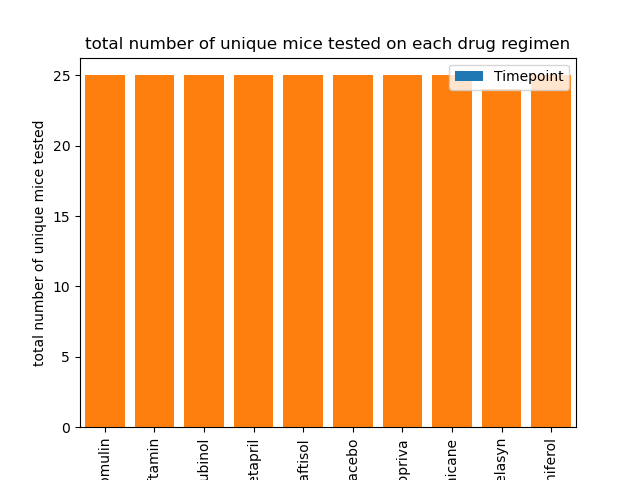

Text(0, 0.5, 'total number of unique mice tested')

In [579]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

groupby_drug = clean_df.groupby("Drug Regimen")
regimen_count = pd.DataFrame(groupby_drug["Timepoint"].count())
regimen_count

count_bar = regimen_count.plot(kind = "bar", title = "total number of unique mice tested on each drug regimen")
count_bar.set_ylabel("total number of unique mice tested")


In [581]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

tick = regimen_count.index.values.tolist()
y_axis = list(regimen_count["Timepoint"])
x_axis = np.arange(len(y_axis))

print(tick)
print(x_axis)
print(y_axis)

plt.bar(x_axis,y_axis)
plt.xticks(x_axis,tick,rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("total number of unique mice tested")
plt.title("total number of unique mice tested on each drug regimen")


['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
[0 1 2 3 4 5 6 7 8 9]
[25, 25, 25, 25, 25, 25, 25, 25, 24, 25]


Text(0.5, 1.0, 'total number of unique mice tested on each drug regimen')

<IPython.core.display.Javascript object>


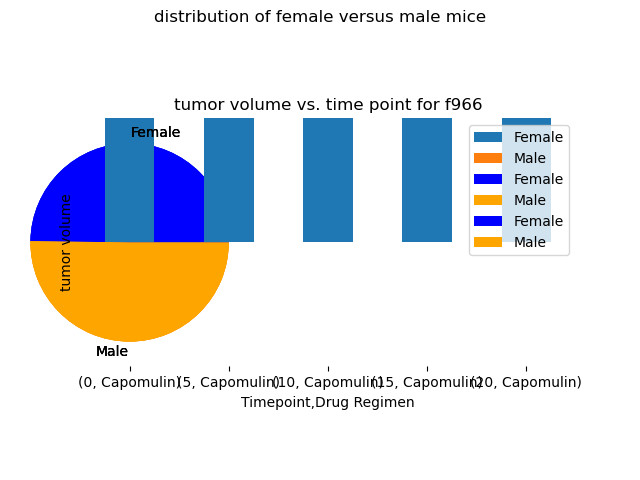

In [582]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

groupby_sex = clean_df.groupby("Sex")
sex_count = pd.DataFrame(groupby_sex["Timepoint"].count())
pandas_pie = sex_count.plot(kind="pie", subplots=True, title="distribution of female versus male mice")


In [584]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = sex_count.index.values.tolist()
sizes = list(sex_count["Timepoint"])
colors = ["Blue","Orange"]

plt.pie(sizes, labels=labels, colors=colors)
plt.title("distribution of female versus male mice")
plt.legend()


## Quartiles, Outliers and Boxplots

In [585]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
combine_df.sort_values("Mouse ID")
final_tumor = combine_df.groupby(['Mouse ID'],as_index=False)
final_tumor = final_tumor["Timepoint"].max()
final_tumor

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merge_df = pd.merge(final_tumor, combine_df, on=['Mouse ID', 'Timepoint'])
merge2_df = merge_df[['Mouse ID', 'Timepoint','Tumor Volume (mm3)','Drug Regimen']]
merge2_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen
0,a203,45,67.973419,Infubinol
1,a251,45,65.525743,Infubinol
2,a262,45,70.717621,Placebo
3,a275,45,62.999356,Ceftamin
4,a366,30,63.440686,Stelasyn
...,...,...,...,...
244,z435,10,48.710661,Propriva
245,z578,45,30.638696,Ramicane
246,z581,45,62.754451,Infubinol
247,z795,45,65.741070,Naftisol


In [612]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = combine_df["Drug Regimen"].value_counts()
treatments_list = treatments.index.values.tolist() 
print(treatments_list)

# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes    
    # add subset   
    # Determine outliers using upper and lower bounds
    
test = merge2_df.groupby(['Drug Regimen','Mouse ID'])
test2 = test.mean()
test2

treatment_name1 = 'Capomulin'
just_Capomulin = test2.loc[treatment_name1]
just_Capomulin

lowerq = np.percentile(just_Capomulin['Tumor Volume (mm3)'], [25])
uppperq = np.percentile(just_Capomulin['Tumor Volume (mm3)'], [75])
print(lowerq)
print(uppperq)

iqr = uppperq-lowerq
print(iqr)

lower_bound = lowerq - (1.5 * iqr)
uppper_bound = uppperq + (1.5 * iqr)
print(lower_bound)
print(uppper_bound)

print(f"For subset Capomulin, value below {lower_bound} could be outliers.")
print(f"For subset Capomulin, value above {uppper_bound} could be outliers.")

['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Placebo', 'Stelasyn', 'Ceftamin', 'Infubinol', 'Propriva']
[32.37735684]
[40.1592203]
[7.78186346]
[20.70456165]
[51.83201549]
For subset Capomulin, value below [20.70456165] could be outliers.
For subset Capomulin, value above [51.83201549] could be outliers.


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
merge2_df


test = merge2_df.groupby(['Drug Regimen','Mouse ID'])
test2 = test.mean()
test2

treatment_name1 = 'Capomulin'
just_Capomulin = test2.loc[treatment_name1]
just_Capomulin_volume = just_Capomulin['Tumor Volume (mm3)']

treatment_name2 = 'Ramicane'
just_Ramicane = test2.loc[treatment_name2]
just_Ramicane_volume = just_Ramicane['Tumor Volume (mm3)']

treatment_name3 = 'Ketapril'
just_Ketapril = test2.loc[treatment_name3]
just_Ketapril_volume = just_Ketapril['Tumor Volume (mm3)']

treatment_name4 = 'Naftisol'
just_Naftisol = test2.loc[treatment_name4]
just_Naftisol_volume = just_Naftisol['Tumor Volume (mm3)']


fig, axs = plt.subplots(2, 2)
axs[0, 0].boxplot(just_Capomulin_volume)
axs[0, 0].set_title('Capomulin')

axs[0, 1].boxplot(just_Ramicane_volume)
axs[0, 1].set_title('Ramicane')

axs[1, 0].boxplot(just_Ramicane_volume)
axs[1, 0].set_title('Ketapril')

axs[1, 1].boxplot(just_Ramicane_volume)
axs[1, 1].set_title('Naftisol')

## Line and Scatter Plots

In [587]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

plot_groupby = combine_df.groupby(['Mouse ID','Timepoint','Drug Regimen'])
plot_table = plot_groupby.mean()
plot_table

mouse_id = 'f966'
just_one_mice = plot_table.loc[mouse_id]
one_graph = just_one_mice['Tumor Volume (mm3)'].plot(kind="bar", title = f"tumor volume vs. time point for {mouse_id}")
one_graph.set_ylabel("tumor volume")


Text(137.6444444444445, 0.5, 'tumor volume')

<IPython.core.display.Javascript object>


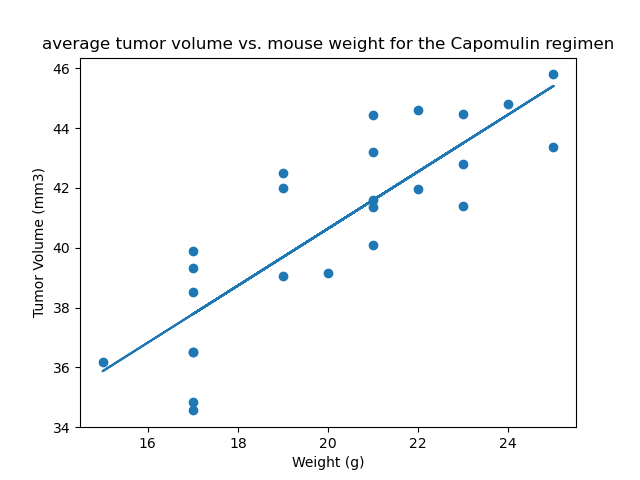

<AxesSubplot:title={'center':'average tumor volume vs. mouse weight for the Capomulin regimen'}, xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

In [588]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

plot2_groupby = combine_df.groupby(['Drug Regimen','Mouse ID'])
plot2_table = plot2_groupby.mean()

treatment = 'Capomulin'
just_one_treatment = plot2_table.loc[treatment]
just_one_treatment.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", title="average tumor volume vs. mouse weight for the Capomulin regimen")


## Correlation and Regression

In [589]:
# Calculate the correlation coefficient 

plot2_groupby = combine_df.groupby(['Drug Regimen','Mouse ID'])
plot2_table = plot2_groupby.mean()

treatment = 'Capomulin'
just_one_treatment = plot2_table.loc[treatment]
just_one_treatment

weight = just_one_treatment.iloc[:,2]
volume = just_one_treatment.iloc[:,4]

correlation = st.pearsonr(weight,volume)
correlation

(0.44393919008975496, 0.02621119586367469)

In [590]:
#linear regression model for mouse weight and average tumor volume for the Capomulin regimen

x_value = just_one_treatment['Weight (g)']
y_value = just_one_treatment['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value,y_value)
(slope, intercept, rvalue, pvalue, stderr)
regress_values = x_value * slope + intercept
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values)
